In [20]:
#import zipfile
#import os

## Replace 'dataset.zip' with the actual filename
#zip_path = 'archive.zip'
#extract_path = 'asl_dataset'
## Create a folder to extract to (optional)
#os.makedirs(extract_path, exist_ok=True)
## Extract
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)


In [21]:
# Display first few file paths from dataset
import os
for root, dirs, files in os.walk('asl_dataset'):
    for file in files[:5]:
        print(os.path.join(root, file))

asl_dataset\asl_alphabet_test\asl_alphabet_test\A_test.jpg
asl_dataset\asl_alphabet_test\asl_alphabet_test\B_test.jpg
asl_dataset\asl_alphabet_test\asl_alphabet_test\C_test.jpg
asl_dataset\asl_alphabet_test\asl_alphabet_test\del_test.jpg
asl_dataset\asl_alphabet_test\asl_alphabet_test\D_test.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A10.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A100.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1000.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1001.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\B\B1.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\B\B10.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\B\B100.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\B\B1000.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\B\B1001.jpg
asl_dataset\asl_alphabet_train\asl_alphabet_train\C\C1.jpg
asl_dataset\asl_alphabet_train\asl_a

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score

In [23]:
def imgPaths(filepaths, dataset_type='train'):
    filepaths = [Path(p) for p in filepaths]
    
    labels = []
    print("Sample file paths and extracted labels:")
    
    for p in filepaths:
        if dataset_type == 'train':
            label = p.parent.name  # Parent folder name for train images
        else:
            # For test images: extract label from filename prefix before underscore
            label = p.name.split('_')[0] 
        labels.append(label)
        print(p, "->", label)
    
    df = pd.DataFrame({
        'Filepath': [str(p) for p in filepaths],
        'Label': labels
    })
    df = df.sample(frac=1).reset_index(drop=True)  # Shuffle dataframe
    return df

In [24]:
# Define dataset directories relative to your notebook location
train_image_dir = Path('asl_dataset/asl_alphabet_train/asl_alphabet_train')
test_image_dir = Path('asl_dataset/asl_alphabet_test/asl_alphabet_test')

# Correct glob patterns based on folder structure
train_filepaths = list(train_image_dir.glob('*/*.jpg'))  # One subfolder level for train images
test_filepaths = list(test_image_dir.glob('*.jpg'))      # Test images directly inside this folder


# Create DataFrames with correct label extraction
train_df = imgPaths(train_filepaths, dataset_type='train')
test_df = imgPaths(test_filepaths, dataset_type='test')

# Show unique labels in train set
df_unique = train_df.drop_duplicates(subset=["Label"]).reset_index(drop=True)

Sample file paths and extracted labels:
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A10.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A100.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1000.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1001.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1002.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1003.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1004.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1005.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1006.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1007.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1008.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A1009.jpg -> A
asl_dataset\asl_alphabet_train\asl_alphabet_train\A\A101.jpg -> A
asl_dataset\asl_alphabet_trai

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Sample file paths and extracted labels:
asl_dataset\asl_alphabet_test\asl_alphabet_test\A_test.jpg -> A
asl_dataset\asl_alphabet_test\asl_alphabet_test\B_test.jpg -> B
asl_dataset\asl_alphabet_test\asl_alphabet_test\C_test.jpg -> C
asl_dataset\asl_alphabet_test\asl_alphabet_test\del_test.jpg -> del
asl_dataset\asl_alphabet_test\asl_alphabet_test\D_test.jpg -> D
asl_dataset\asl_alphabet_test\asl_alphabet_test\E_test.jpg -> E
asl_dataset\asl_alphabet_test\asl_alphabet_test\F_test.jpg -> F
asl_dataset\asl_alphabet_test\asl_alphabet_test\G_test.jpg -> G
asl_dataset\asl_alphabet_test\asl_alphabet_test\H_test.jpg -> H
asl_dataset\asl_alphabet_test\asl_alphabet_test\I_test.jpg -> I
asl_dataset\asl_alphabet_test\asl_alphabet_test\J_test.jpg -> J
asl_dataset\asl_alphabet_test\asl_alphabet_test\K_test.jpg -> K
asl_dataset\asl_alphabet_test\asl_alphabet_test\L_test.jpg -> L
asl_dataset\asl_alphabet_test\asl_alphabet_test\M_test.jpg -> M
asl_dataset\asl_alphabet_test\asl_alphabet_test\nothing_test

In [25]:
# Define ImageDataGenerators with augmentations for train, just preprocessing for test
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    brightness_range=(0.75, 1.3),
    rotation_range=20,
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Flow training images with split into training/validation subsets
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

# Flow test images (no shuffling, no labels in test set maybe?)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',   # assuming you want labels; if not available use class_mode=None
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

# Load pretrained MobileNetV2 without top layers
pretrainedModel = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze pretrained weights
pretrainedModel.trainable = False

Found 69600 validated image filenames belonging to 29 classes.
Found 17400 validated image filenames belonging to 29 classes.
Found 29 validated image filenames belonging to 29 classes.


In [26]:
inputs = pretrainedModel.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrainedModel.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(29, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=2,
    callbacks=[
         tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
     ]
 )

Epoch 1/2
2175/2175 [==============================] - 1160s 533ms/step - loss: 0.4019 - accuracy: 0.8767 - val_loss: 0.2060 - val_accuracy: 0.9351
Epoch 2/2
2175/2175 [==============================] - 1407s 647ms/step - loss: 0.1509 - accuracy: 0.9501 - val_loss: 0.1280 - val_accuracy: 0.9568


In [27]:
# results = model.evaluate(test_images, verbose=0)

with open("asl_model_architecture.json", "w") as f:
    f.write(model.to_json())

model.save_weights("asl_model.weights.h5")
results = model.evaluate(test_images)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

1/1 [==============================] - 0s 438ms/step - loss: 0.0111 - accuracy: 1.0000
    Test Loss: 0.01105
Test Accuracy: 100.00%


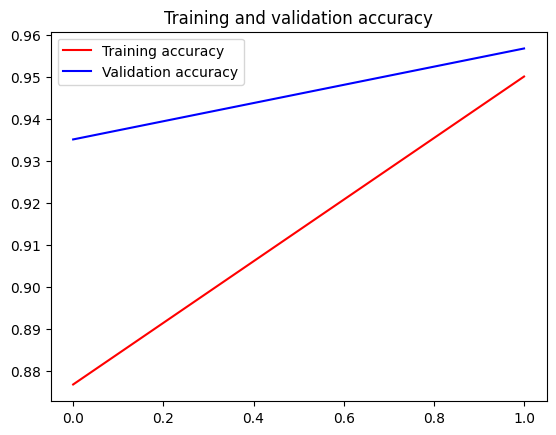

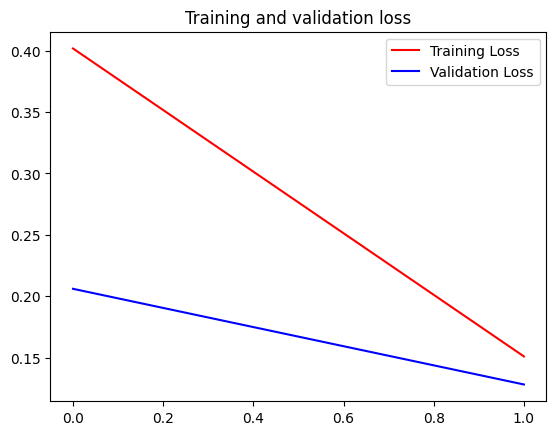

In [28]:
# DRAW Results
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
#!pip install tensorflow==2.10.0 keras==2.10.0
model.save("asl_model_v3.h5")